In [4]:
#2nd attempt at kaggle competition using what i learned from datacamp supervised learning course chapter 1 and 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
titanic = pd.read_csv('data/titanic/train.csv')

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


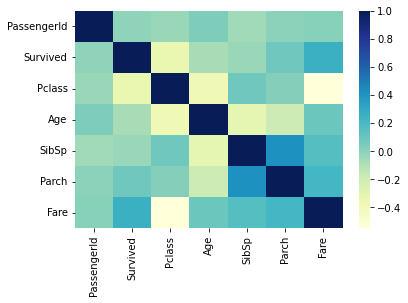

In [7]:
#check for correlations
import seaborn as sns

sns.heatmap(titanic.corr(), cmap='YlGnBu')
plt.show()

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self,X, y=None):
        return self
    
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X, y=None):
        return self
    
    def transform(self,X):
        encoder =OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C", "S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Male","Female"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X
    

class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self,X, y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1, errors="ignore")

In [42]:
#make a pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                    ("featureencoder", FeatureEncoder()),
                    ("featuredropper",FeatureDropper())])

In [43]:
titanic_piped = pipeline.fit_transform(titanic)

In [44]:
titanic_piped.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
0,1,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [45]:
X = titanic_piped.drop(["Survived"], axis=1).values
y = titanic_piped['Survived'].values

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                   random_state=32, stratify=y)

knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


0.6604477611940298


In [48]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

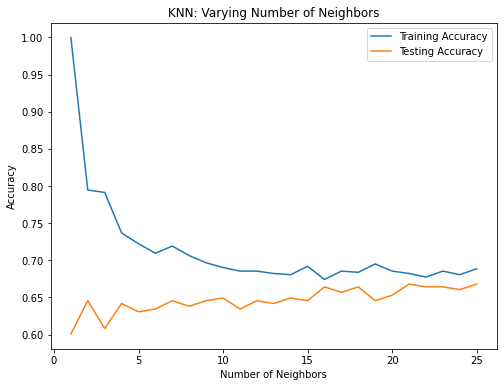

In [49]:
#plot the results
plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(),label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(),label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.4,
                                                   random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[184  32]
 [ 89  52]]


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       216
           1       0.62      0.37      0.46       141

    accuracy                           0.66       357
   macro avg       0.65      0.61      0.61       357
weighted avg       0.65      0.66      0.64       357



In [18]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
242,243,0,2,29.00000,0,0,10.50,0.0,0.0,1.0,0.0,1.0
264,265,0,3,29.94709,0,0,7.75,0.0,1.0,0.0,1.0,0.0
403,404,0,3,28.00000,1,0,15.85,0.0,0.0,1.0,0.0,1.0
250,251,0,3,29.94709,0,0,7.25,0.0,0.0,1.0,0.0,1.0
676,677,0,3,24.50000,0,0,8.05,0.0,0.0,1.0,0.0,1.0


In [19]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 242 to 432
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Male         712 non-null    float64
 11  Female       712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [20]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(["Survived"], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [21]:
X_data

array([[-0.78930277, -0.37019624, -0.07256232, ...,  0.60764362,
        -0.73561236,  0.73561236],
       [-0.70452392,  0.82789342,  0.        , ..., -1.64570147,
         1.35941164, -1.35941164],
       [-0.16887574,  0.82789342, -0.1491784 , ...,  0.60764362,
        -0.73561236,  0.73561236],
       ...,
       [-0.27677609, -1.56828591,  0.        , ..., -1.64570147,
         1.35941164, -1.35941164],
       [ 0.97178512,  0.82789342,  0.92344672, ...,  0.60764362,
        -0.73561236,  0.73561236],
       [-0.05712181, -0.37019624,  0.92344672, ...,  0.60764362,
         1.35941164, -1.35941164]])

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [200, 500, 1000],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf,
                           param_grid,
                           cv = 3,
                           scoring="accuracy",
                          return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [23]:
final_clf = grid_search.best_estimator_

In [24]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=500)

In [25]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [26]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
761,762,0,3,41.000000,0,0,7.1250,0.0,0.0,1.0,0.0,1.0
56,57,1,2,21.000000,0,0,10.5000,0.0,0.0,1.0,1.0,0.0
329,330,1,1,16.000000,0,1,57.9792,1.0,0.0,0.0,1.0,0.0
272,273,1,2,41.000000,0,1,19.5000,0.0,0.0,1.0,1.0,0.0
649,650,1,3,23.000000,0,0,7.5500,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
256,257,1,1,28.742653,0,0,79.2000,1.0,0.0,0.0,1.0,0.0
644,645,1,3,0.750000,2,1,19.2583,1.0,0.0,0.0,1.0,0.0
10,11,1,3,4.000000,1,1,16.7000,0.0,0.0,1.0,1.0,0.0
842,843,1,1,30.000000,0,0,31.0000,1.0,0.0,0.0,1.0,0.0


In [27]:
X_test = strat_test_set.drop(["Survived"], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [28]:
final_clf.score(X_data_test, y_data_test)

0.8044692737430168

In [29]:
final_data = pipeline.fit_transform(titanic)

In [30]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   C            891 non-null    float64
 8   S            891 non-null    float64
 9   Q            891 non-null    float64
 10  Male         891 non-null    float64
 11  Female       891 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


In [31]:
X_final = final_data.drop(["Survived"], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [32]:
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [200, 500, 1000],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(prod_clf,
                           param_grid,
                           cv = 3,
                           scoring="accuracy",
                          return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [33]:
prod_final_clf = grid_search.best_estimator_

In [34]:
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [35]:
titanic_test = pd.read_csv('data/titanic/test.csv')

In [36]:
final_test_data = pipeline.fit_transform(titanic_test)

In [37]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [38]:
predictions = prod_final_clf.predict(X_data_final_test)

In [39]:
final_df = pd.DataFrame(titanic_test['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('data/titanic/predictions.csv', index=False)

In [40]:
final_df.shape

(418, 2)